In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Read the data
data = pd.read_csv("data/cluster_predict.csv")
data

,zipcode,Average RE Prices,Income per capita,Median Age Male,Median Age Female,Bachelor's degree > 25,Public transportation,clusters
0,602,114105.2500,9277.0,41.9,42.8,0.134690,0.002796,0
1,606,59377.7500,5943.0,43.2,43.4,0.068866,0.000000,0
2,610,108219.5833,10220.0,40.4,44.2,0.130349,0.002741,0
3,617,101022.0000,9122.0,39.2,41.0,0.157224,0.005154,0
4,693,330761.5000,10536.0,39.2,41.9,0.148064,0.006750,2
...,...,...,...,...,...,...,...,...
29225,99827,211487.0000,33387.0,45.2,45.8,0.229525,0.002308,0
29226,99833,254642.9167,33227.0,39.3,42.7,0.219672,0.009211,0
29227,99835,402391.3333,38423.0,37.2,40.5,0.204494,0.010178,2
29228,99901,294448.8333,34886.0,39.4,39.9,0.170142,0.035648,0


In [3]:
# Add binary column tech_hub
data['tech_hub'] = np.where(data['clusters']==1, 1, 0)
data.sort_values('clusters')

,zipcode,Average RE Prices,Income per capita,Median Age Male,Median Age Female,Bachelor's degree > 25,Public transportation,clusters,tech_hub
0,602,114105.2500,9277.0,41.9,42.8,0.134690,0.002796,0,0
17973,58257,111772.1667,33804.0,34.1,47.0,0.231008,0.003984,0,0
17972,58256,174380.1667,32318.0,37.7,33.2,0.168990,0.000000,0,0
17971,58251,140534.4167,27964.0,37.5,38.2,0.153263,0.000000,0,0
17970,58240,103474.6667,32896.0,47.7,51.1,0.223022,0.003676,0,0
...,...,...,...,...,...,...,...,...,...
2422,10801,546950.9167,33459.0,35.7,36.4,0.168899,0.237051,2,0
2423,10803,896859.5000,72954.0,37.2,40.1,0.287906,0.337685,2,0
2424,10804,791235.7500,88167.0,44.7,46.7,0.320133,0.210861,2,0
24871,80303,636683.9167,43424.0,28.4,34.0,0.339831,0.078163,2,0


In [4]:
data.dtypes

zipcode                     int64
Average RE Prices         float64
Income per capita         float64
Median Age Male           float64
Median Age Female         float64
Bachelor's degree > 25    float64
Public transportation     float64
clusters                    int64
tech_hub                    int64
dtype: object

In [5]:
# Define variables we based predictions on
X = data[['Average RE Prices','Income per capita', 'Median Age Male', 'Median Age Female',

       "Bachelor's degree > 25", 'Public transportation']]

In [6]:
# Define prediction variable - wat we are trying to predict
y = data['tech_hub']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
# Build model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [9]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Validate the model using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9960901226724012
Testing Data Score: 0.9946402098300833


In [11]:
y_pred = classifier.predict(X_test)
df=pd.DataFrame({"Prediction": y_pred, "Actual": y_test})
df

,Prediction,Actual
6085,0,0
2516,0,0
26841,0,0
26290,0,0
4715,0,0
...,...,...
24085,0,0
11948,0,0
12997,0,0
13187,0,0


In [12]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print("TP FN")
print("FN TP")

Confusion Matrix
[[8639   23]
 [  24   83]]
TP FN
FN TP


In [13]:
cr =classification_report(y_test,y_pred)
print("Classification Report")
print(cr)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8662
           1       0.78      0.78      0.78       107

    accuracy                           0.99      8769
   macro avg       0.89      0.89      0.89      8769
weighted avg       0.99      0.99      0.99      8769



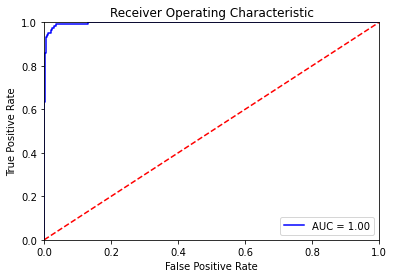

In [14]:
#ROC AUC Curve
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
import pickle
pickle.dump(classifier, open('model.pickle', 'wb'))